In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# DATA

In [2]:
file_path = '../../src/data/temp/zbp_totals_with_features.csv'
data = pd.read_csv(file_path)
data.head()

,zip,emp_nf,emp,qp1_nf,qp1,ap_nf,ap,est,year,naics_11_pct,...,naics_99_pct,n1_4_pct,n5_9_pct,n10_19_pct,n20_49_pct,n50_99_pct,n100_249_pct,n250_499_pct,n500_999_pct,n1000_pct
0,91901,H,4141,H,36304,H,174786,391,2012,0.000000,...,0.0,0.649616,0.166240,0.107417,0.056266,0.010230,0.005115,0.002558,0.0,0.002558
1,91902,G,2265,G,19111,G,81569,349,2012,0.002865,...,0.0,0.641834,0.183381,0.094556,0.060172,0.017192,0.002865,0.000000,0.0,0.000000
2,91903,S,0,G,123,G,491,13,2012,0.000000,...,0.0,0.923077,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,91905,G,19,S,0,H,748,9,2012,0.000000,...,0.0,0.777778,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,91906,D,0,D,0,D,0,27,2012,0.000000,...,0.0,0.629630,0.222222,0.074074,0.037037,0.000000,0.000000,0.037037,0.0,0.000000


In [3]:
data.columns

Index(['zip', 'emp_nf', 'emp', 'qp1_nf', 'qp1', 'ap_nf', 'ap', 'est', 'year',
       'naics_11_pct', 'naics_21_pct', 'naics_22_pct', 'naics_23_pct',
       'naics_31_pct', 'naics_42_pct', 'naics_44_pct', 'naics_48_pct',
       'naics_51_pct', 'naics_52_pct', 'naics_53_pct', 'naics_54_pct',
       'naics_55_pct', 'naics_56_pct', 'naics_61_pct', 'naics_62_pct',
       'naics_71_pct', 'naics_72_pct', 'naics_81_pct', 'naics_99_pct',
       'n1_4_pct', 'n5_9_pct', 'n10_19_pct', 'n20_49_pct', 'n50_99_pct',
       'n100_249_pct', 'n250_499_pct', 'n500_999_pct', 'n1000_pct'],
      dtype='object')

# Exploratory Data Analysis

In below, we check for trends within the above features, Specifically how they change over time and coorelation with the number of establishments (est)

Check the hypotheses from the paper that inspired our feature selection

## Coorelation Matrix

In [ ]:
corr = data.drop(columns=['emp_nf', 'qp1_nf', 'ap_nf']).corr()
corr[['est']].sort_values('est', ascending=False).style.background_gradient(cmap='coolwarm')

In [ ]:
i = 0
for curr_zip in data['zip'].unique():
    i += 1
    curr_data = data[data['zip']==curr_zip]
    plt.plot(curr_data['year'], curr_data['est'], label=curr_zip)
    
    if i % 10 == 0:
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
        plt.figure()
    
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

## Top Zipcodes

In [ ]:
data.groupby('zip')['est'].mean().sort_values(ascending=False).head(25).plot(kind='bar')

In [ ]:
data.groupby('zip')['emp'].mean().sort_values(ascending=False).head(25).plot(kind='bar')

In [ ]:
data.groupby('zip')['ap'].mean().sort_values(ascending=False).head(25).plot(kind='bar')

In [ ]:
data.groupby('zip')['median_hh_income'].mean().sort_values(ascending=False).head(25).plot(kind='bar')

In [ ]:
data.groupby('zip')['total_population'].mean().sort_values(ascending=False).head(25).plot(kind='bar')

In [ ]:
data.groupby('zip')['total_retirement'].mean().sort_values(ascending=False).head(25).plot(kind='bar')

In [ ]:
data.groupby('zip')['total_midcareer (25-34)'].mean().sort_values(ascending=False).head(25).plot(kind='bar')

In [ ]:
data.groupby('zip')['total_midcareer (35-44)'].mean().sort_values(ascending=False).head(25).plot(kind='bar')

In [ ]:
data.groupby('zip')['n1_4_pct'].mean().sort_values(ascending=False).head(25).plot(kind='bar')

In [ ]:
data.groupby('zip')['n1000_pct'].mean().sort_values(ascending=False).head(25).plot(kind='bar')

In [ ]:
data.groupby('zip')['naics_55_pct'].mean().sort_values(ascending=False).head(25).plot(kind='bar')

## Number of Mid-Career Adults

In [ ]:
data.groupby('zip')[['total_midcareer (25-34)', 'est']].mean().plot(kind='scatter', x='total_midcareer (25-34)', y='est')

In [ ]:
data.groupby('zip')[['total_midcareer (35-44)', 'est']].mean().plot(kind='scatter', x='total_midcareer (35-44)', y='est')

## Greater Personal Wealth

In [ ]:
data.groupby('zip')[['median_hh_income', 'est']].mean().plot(kind='scatter', x='median_hh_income', y='est')

## Population Growth

In [ ]:
data.groupby('zip')[['emp', 'est']].mean().plot(kind='scatter', x='emp', y='est')

## Economic Diversity = More Smaller Organizations

In [ ]:
data.groupby('zip')[['n1_4_pct', 'est']].mean().plot(kind='scatter', x='n1_4_pct', y='est')

In [ ]:
data.groupby('zip')[['ap', 'est']].mean().plot(kind='scatter', x='ap', y='est')

## Distribution of Business Sizes

In [ ]:
data[['n1_4_pct', 'n5_9_pct', 'n10_19_pct', 'n20_49_pct', 'n50_99_pct',
       'n100_249_pct', 'n250_499_pct', 'n500_999_pct', 'n1000_pct']].mean()

## Distrubution of Business Industries

In [ ]:
data[['naics_11_pct', 'naics_21_pct', 'naics_22_pct', 'naics_23_pct',
       'naics_31_pct', 'naics_42_pct', 'naics_44_pct', 'naics_48_pct',
       'naics_51_pct', 'naics_52_pct', 'naics_53_pct', 'naics_54_pct',
       'naics_55_pct', 'naics_56_pct', 'naics_61_pct', 'naics_62_pct',
       'naics_71_pct', 'naics_72_pct', 'naics_81_pct', 'naics_99_pct']].mean().sort_values(ascending=False)

## Total Mid-Career Feature w/ Ages (25-34) Sharply Declining 2016-2017

In [ ]:
i = 0
for curr_zip in data['zip'].unique():
    i += 1
    curr_data = data[data['zip']==curr_zip]
    plt.plot(curr_data['year'], curr_data['total_midcareer (25-34)'], label=curr_zip)
    
    if i % 10 == 0:
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
        plt.figure()
    
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

## Total Mid-Career Feature w/ Ages (35-44) Sharply Rising 2016-2017

In [ ]:
i = 0
for curr_zip in data['zip'].unique():
    i += 1
    curr_data = data[data['zip']==curr_zip]
    plt.plot(curr_data['year'], curr_data['total_midcareer (35-44)'], label=curr_zip)
    
    if i % 10 == 0:
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
        plt.figure()
    
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

San Diego has had trouble retaining it's young adult population, as a result, we split the Mid-Career feature into two groups: 25-34 years and 35-44 years to try to gain more detailed insights.

## Total Retirement Rising

In [ ]:
i = 0
for curr_zip in data['zip'].unique():
    i += 1
    curr_data = data[data['zip']==curr_zip]
    plt.plot(curr_data['year'], curr_data['total_retirement'], label=curr_zip)
    
    if i % 10 == 0:
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
        plt.figure()
    
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

### Sharp increase in Total Retirement population from 2016-2017. Large generation group entering retirement age?

## Median Household Income Rising

In [ ]:
i = 0
for curr_zip in data['zip'].unique():
    i += 1
    curr_data = data[data['zip']==curr_zip]
    plt.plot(curr_data['year'], curr_data['median_hh_income'], label=curr_zip)
    
    if i % 10 == 0:
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
        plt.figure()
    
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

## Population Not Changing Significantly

In [ ]:
i = 0
for curr_zip in data['zip'].unique():
    i += 1
    curr_data = data[data['zip']==curr_zip]
    plt.plot(curr_data['year'], curr_data['total_population'], label=curr_zip)
    
    if i % 10 == 0:
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
        plt.figure()
    
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

## Annual Payroll Rising

In [ ]:
i = 0
for curr_zip in data['zip'].unique():
    i += 1
    curr_data = data[data['zip']==curr_zip]
    plt.plot(curr_data['year'], curr_data['ap'], label=curr_zip)
    
    if i % 10 == 0:
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
        plt.figure()
    
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

## Unemployment Over The Years

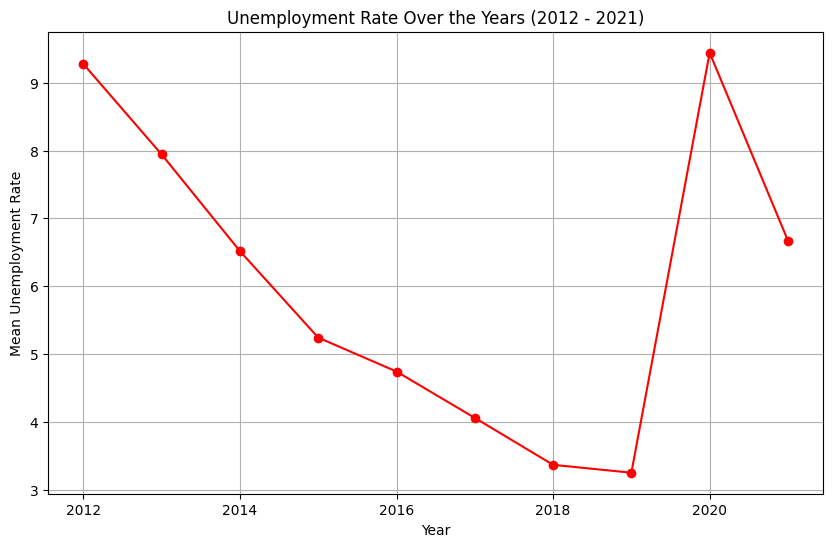

In [57]:
file_path = '../../src/data/raw/employment_data/employment.csv'
employment_rate = pd.read_csv(file_path)

# Only get the year
employment_rate['year'] = pd.to_datetime(employment_rate['DATE']).dt.year

employment_rate = employment_rate.drop(columns=['DATE','CASAND5URN_20240104'])

employment_rate.rename(columns={'CASAND5URN_20231130': 'unemployment_rate'}, inplace=True)

unemployment_by_year = employment_rate.groupby('year')['unemployment_rate'].mean().reset_index()


unemployment_rate_over_years = unemployment_by_year.groupby('year')['unemployment_rate'].mean()


plt.figure(figsize=(10, 6))
unemployment_rate_over_years.plot(marker='o', linestyle='-', color='r')
plt.title('Unemployment Rate Over the Years (2012 - 2021)')
plt.xlabel('Year')
plt.ylabel('Mean Unemployment Rate')
plt.grid(True)
plt.show()

## Establishment Growth

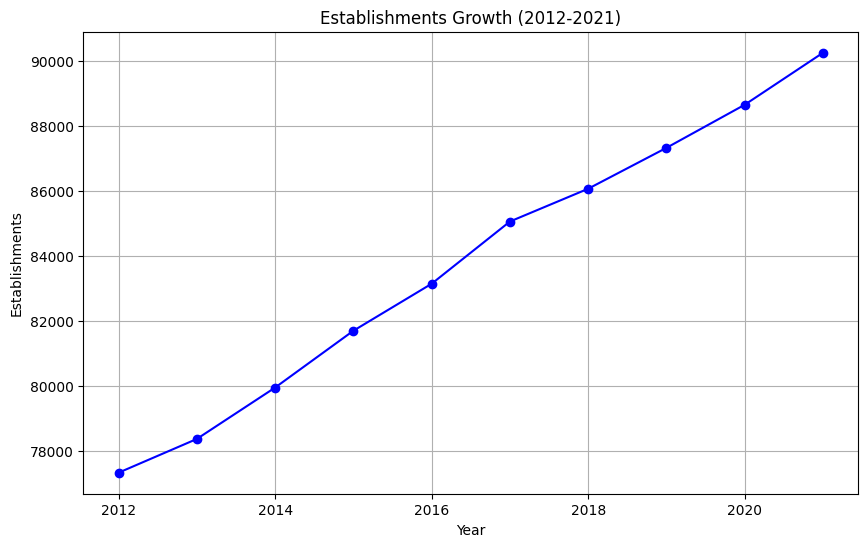

In [56]:
sum_establishments_by_year = zbp_totals.groupby('year')['est'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(sum_establishments_by_year['year'], sum_establishments_by_year['est'], marker='o', linestyle='-', color='b')
plt.title('Establishments Growth (2012-2021)')
plt.xlabel('Year')
plt.ylabel('Establishments')
plt.grid(True)
plt.show()